In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import pandas as pd
import math

przepisać równanie ribby
skopiować dane ribby dotyczące chorych

In [2]:

# df =  pd.read_csv('data/fig1_mtd_pcv_00.csv',names = ['t','mtd','id'],header=None)
df =  pd.read_csv('data/fig1_mtd_pcv_00.csv',names = ['t','mtd','id'])
df1 = pd.read_csv('data/fig1_mtd_pcv_01.csv',names = ['t','mtd','id'])
df.id.unique()

array([0, 1, 2, 3])

In [3]:
df1.id.unique()

array([201, 202, 203, 204, 205, 206])

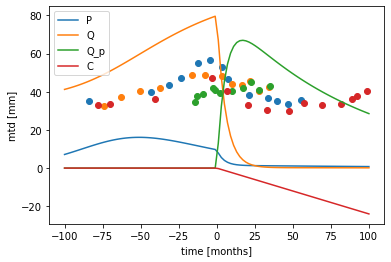

In [35]:
# Ribba
my = RibbaModel(
    lambda_p=0.121,
    delta_qp=  0.00867,
    gamma_q  = 0.729, 
    gamma_p = 0.729,  
    KDE = 0.24, 
    k_qpp = 0.0031, 
    k_pq = 0.0295, 
    K = 100.0 
)

t = np.linspace(-100,100,100)
y = my.run(
    t =t,
    P=7.13,
    Q=41.2,
    Q_p=0.0,
    C=0.0
)

plt.plot(t,y[:,0],label="P")
plt.plot(t,y[:,1],label="Q")
plt.plot(t,y[:,2],label="Q_p")
plt.plot(t,y[:,3],label="C")


plt.legend(loc="upper left")
for i in df.id.unique():
    patient = df[df.id ==i]
    plt.scatter(patient.t,patient.mtd)

plt.xlabel("time [months]")
plt.ylabel("mtd [mm]")

plt.show()

In [42]:
class RibbaModel():

    def __init__(self,lambda_p,delta_qp,gamma_q,gamma_p,KDE,k_qpp,k_pq,K):
        self.lambda_p = lambda_p # the rate constant of growth used in the logistic expression for the expansion of proliferative tissue. Tumor specific
        self.delta_qp = delta_qp  # rate constant for elimination of the damaged quiescent tissue.
        self.gamma_q =gamma_q # damages in quiescent tissue. Treatment specific
        self.gamma_p =gamma_p # damages in proliferative tissue. Treatment specific
        self.KDE = KDE # KDE is the rate constant for the decay of the PCV concentration in plasma, denoted C.
        self.k_qpp =k_qpp # the rate constant for transfer from damaged quiescent tissue to proliferative tissue,
        self.k_pq = k_pq # the rate constant for transition from proliferation to quiescence. Tumor specific
        self.K =K # fixed maximal tumor size 100 mm 
        
    def run(self,t,P,Q,Q_p,C):
        
        y = odeint(RibbaModel.equations,[P,Q,Q_p,C],t,args=(self.lambda_p,self.delta_qp,self.gamma_q,self.gamma_p,self.KDE,self.k_qpp,self.k_pq,self.K))
        return y
    
    
    """
    P  #proliferative tissue
    C  #drug concentration in plasma
    Q_p =  damaged quiescent tissue
    Q     quiescent tissue
    """
    @staticmethod
    def equations(y,t,lambda_p,delta_qp,gamma_q,gamma_p,KDE,k_qpp,k_pq,K):
        [P,Q, Q_p, C] = y
        
        
        if t<0:
            C=0.0
        elif t==0:
            C=1.0
        elif t>0 and C<=0:
            C =0.0
            

        dCdt = - KDE * C
        dPdt = lambda_p * P*(1 - (P + Q + Q_p)/K) + k_qpp * Q_p - k_pq * P - gamma_p * C * KDE * P
        dQdt = k_pq * P - gamma_q * C * KDE * Q
        dQ_pdt = gamma_q * C *KDE * Q - k_qpp * Q_p - delta_qp * Q_p
        return [dPdt,dQdt,dQ_pdt,dCdt]

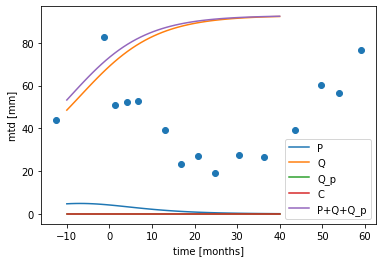

In [43]:
# dr Siwik
pd.options.mode.chained_assignment = None  # default='warn'


def to_volume(mtd):
    return math.pi * mtd**3/6


def preprocess(mtd):
    val = to_volume(mtd)
    return val/1500

my = RibbaModel(
    lambda_p=0.6326,
    delta_qp=  0.6455,
    gamma_q  = 1.3495, 
    gamma_p = 4.6922,  
    KDE = 0.10045, 
    k_qpp = 0.0,
    k_pq = 0.43562,
    K = 192.418
)

t = np.linspace(-10,40,50)
y = my.run(
    t =t,
    P=4.7279,
    Q=48.5147,
    Q_p=0.0,
    C=0.0
)
P = y[:,0]
Q = y[:,1]
Q_p = y[:,2]
C = y[:,3]


plt.plot(t,y[:,0],label="P")
plt.plot(t,y[:,1],label="Q")
plt.plot(t,y[:,2],label="Q_p")
plt.plot(t,y[:,3],label="C")
plt.plot(t,P+Q+Q_p, label="P+Q+Q_p")
plt.legend(loc="lower right")


df4 = pd.read_csv('data/fig4.csv',names = ['t','mtd','id'])
patient = df4[df4.id ==2]
# display(patient)
patient['mtd'] = patient['mtd'].map(lambda x: preprocess(x))
# display(patient)

plt.scatter(patient.t,patient.mtd)


plt.xlabel("time [months]")
plt.ylabel("mtd [mm]")

plt.show()

In [7]:
df4.id.unique

<bound method Series.unique of 0     17
1     17
2     17
3     17
4     17
      ..
79    20
80    13
81    13
82    13
83    13
Name: id, Length: 84, dtype: int64>

In [8]:
P0 = 0.1*list(patient.mtd)[0]
Q0 = 0.9*list(patient.mtd)[0]
Q_p0 = 0.0 # We assumed Q_p0 = 0 when t=0 in the absence of treatment.
C =1.0 #??

t = np.linspace(-100,100,100)

y = odeint(model,[P0,Q0,Q_p0,C],t)

# print(y)

print(y[:,0])
plt.scatter(list(patient.t),list(patient.mtd))
plt.plot(t,y)

NameError: name 'model' is not defined

In [ ]:
# df = df.sort(t)
patient = df[df.id ==1]
list(patient.t)[0]

In [ ]:
df